In [1]:
!pip install spacy networkx matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


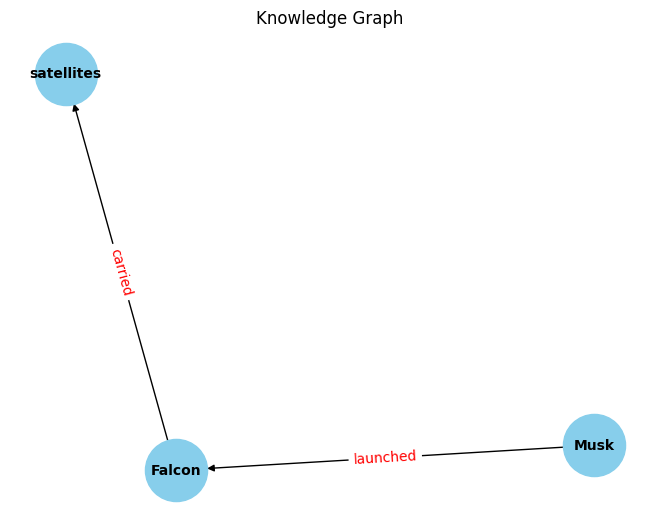

In [2]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample text
text = """Elon Musk founded SpaceX. SpaceX launched Falcon 9. Falcon 9 carried Starlink satellites."""

# Process text with spaCy
doc = nlp(text)

# Function to extract entities and relationships
def extract_entities_relations(doc):
    entities = []
    relations = []
    
    for sent in doc.sents:
        subj = None
        obj = None
        verb = None
        
        for token in sent:
            if token.dep_ in ("nsubj", "nsubjpass"):
                subj = token
            elif token.dep_ == "dobj":
                obj = token
            elif token.pos_ == "VERB":
                verb = token
        
        if subj and obj and verb:
            entities.append((subj.text, obj.text))
            relations.append((subj.text, verb.text, obj.text))
    
    return entities, relations

# Extract entities and relationships
entities, relations = extract_entities_relations(doc)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for subj, obj in entities:
    G.add_node(subj)
    G.add_node(obj)

for subj, verb, obj in relations:
    G.add_edge(subj, obj, label=verb)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')

# Display the plot
plt.title("Knowledge Graph")
plt.show()
